# Código.

In [1]:
# Importamos las librerias y dependencias necesarias.
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
datos = pd.read_csv('dat.csv', index_col=None)

In [25]:
datos.head(20)

,source,target
0,a,b
1,a,c
2,a,d
3,b,a
4,b,g
5,b,c
6,a,z
7,b,z
8,b,d
9,b,h


In [26]:
relationship_df = pd.DataFrame(datos)

In [27]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,a,b
1,a,c
2,a,d
3,b,a
4,b,g
5,b,c
6,a,z
7,b,z
8,b,d
9,b,h


In [28]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,a,b
1,a,c
2,a,d
3,a,b
4,b,g
5,b,c
6,a,z
7,b,z
8,b,d
9,b,h


In [29]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [30]:
relationship_df.head(20)

,source,target,value
0,a,b,2
1,a,c,1
2,a,d,1
3,b,g,1
4,b,c,1
5,a,z,1
6,b,z,1
7,b,d,1
8,b,h,1
9,b,q,1


# Grafo

In [12]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

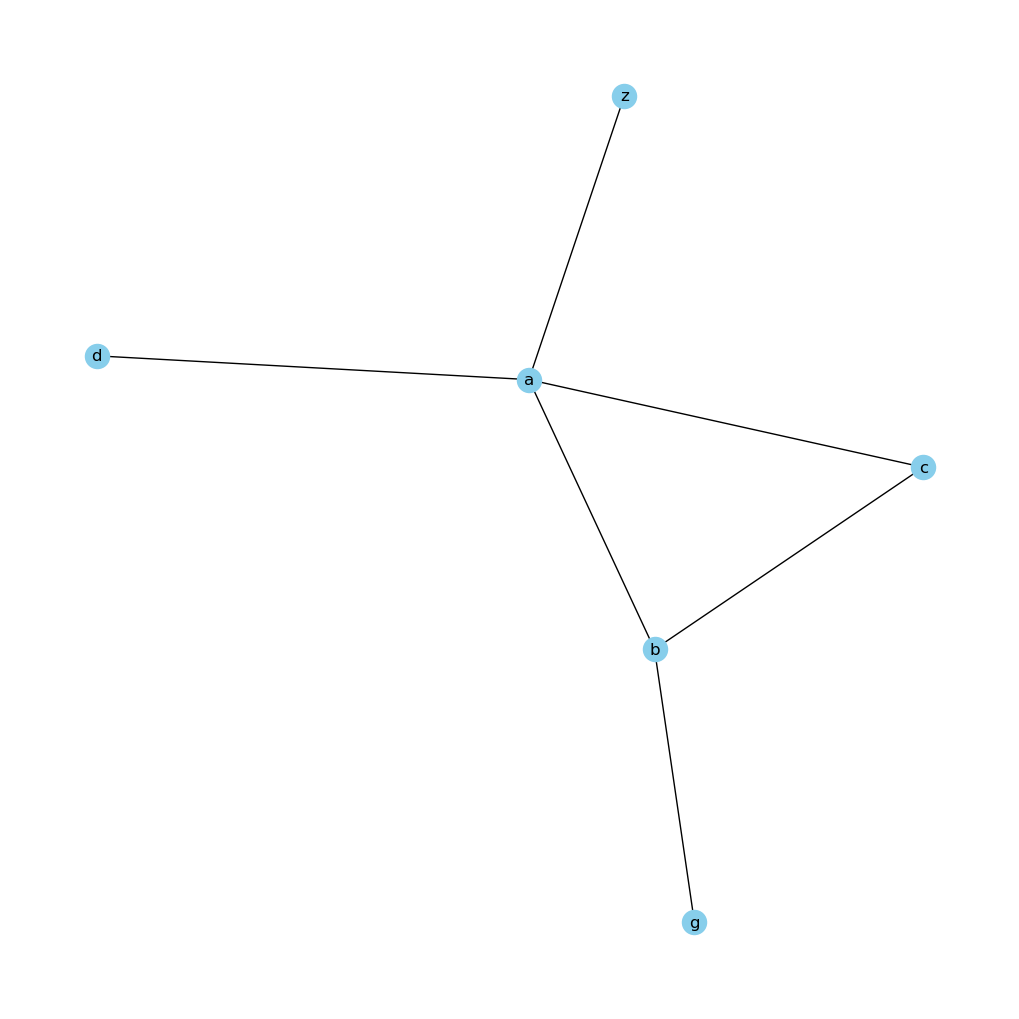

In [13]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [31]:
relationship_df.describe(include='object')

,source,target
count,10,10
unique,2,7
top,b,c
freq,6,2
